# This notebook is dedicated to building baseline classification models for ADVB MLOps project

### Candidate models:
- LogReg
- Naive Bayes
- SVM
- Decision tree

### Candidate metrics:
- F1 Score
- Accuracy
- ROC AUC plot
- Plot confusion matrix

In [38]:
#logreg
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix 
import seaborn as sns

In [40]:
train = pd.read_csv('/Users/michaelmiller/Documents/GitHub/MLOps_project/Classification models/data/train.csv')
y_train = train['y']
x_train = train.drop('y',axis=1)

x_test = pd.read_csv('/Users/michaelmiller/Documents/GitHub/MLOps_project/Classification models/data/train.csv')
y_test = x_test['y']
x_test = x_test.drop('y',axis=1)


In [7]:
# first idea - use XGBoost classifier and plot its importances for them to be used elsewhere
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100)

[Text(0.5, 0, 'feature importance'), Text(0.5, 1.0, 'Feature importance plot')]

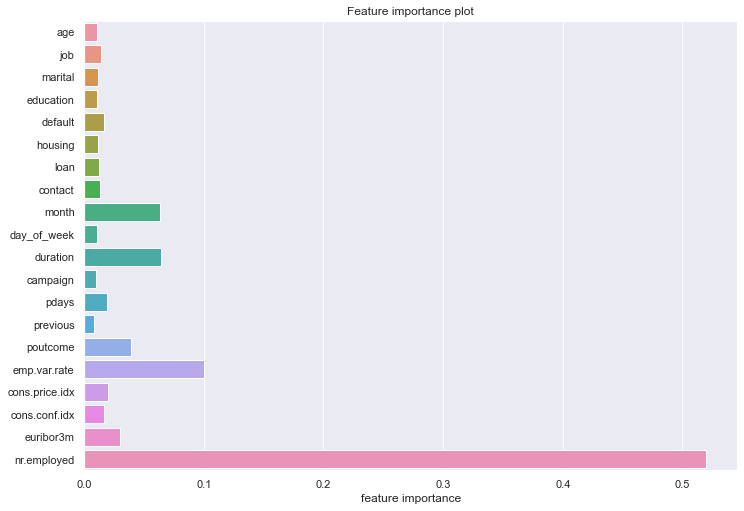

In [22]:
xgb.fit(x_train, y_train);
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y=x_train.columns, x=xgb.feature_importances_).set(xlabel='feature importance', title='Feature importance plot')

In [41]:
x_test=x_test[['month','duration','nr.employed','poutcome','emp.var.rate']]
x_train = x_train[['month','duration','nr.employed','poutcome','emp.var.rate']]

In [50]:
# fitting logreg with grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['none','l2']
}
logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1')
grid_search.fit(x_train, y_train)
best_logreg = grid_search.best_estimator_

/Users/michaelmiller/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1504: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/michaelmiller/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1504: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/michaelmiller/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1504: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/michaelmiller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/michaelmiller/opt/anaconda3/lib/pytho

In [51]:
y_pred = best_logreg.predict(x_test)
f1_score(y_pred,y_test)

0.8434257395075112

In [39]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

In [63]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

dt = DecisionTreeClassifier()
grid_search_tree = GridSearchCV(dt, param_grid, cv=5, scoring='f1')
grid_search_tree.fit(x_train, y_train)
best_tree = grid_search_tree.best_estimator_

In [64]:
y_pred = best_tree.predict(x_test)
f1_score(y_pred,y_test)

0.8850608850608852

In [56]:
# random forest
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [25,50,100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,3,5],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier()
grid_search_forest = GridSearchCV(rf, param_grid, cv=5, scoring='f1')
grid_search_forest.fit(x_train, y_train)
best_forest = grid_search_forest.best_estimator_

In [60]:
y_pred1 = best_forest.predict(x_test)
f1_score(y_pred1,y_test)

0.8893818396923986

In [62]:
print('logreg accuracy: ', best_logreg.score(x_test,y_test))
print('tree accuracy: ', best_tree.score(x_test,y_test))
print('random forest accuracy: ', best_forest.score(x_test,y_test))

logreg accuracy:  0.8410377358490566
tree accuracy:  0.8783018867924528
random forest accuracy:  0.8823899371069183


In [66]:
# boosting with XGBoost
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
grid_search_boost = GridSearchCV(xgb, param_grid, cv=5, scoring='f1')
grid_search_boost.fit(x_train, y_train)
best_boost = grid_search_boost.best_estimator_


In [68]:
y_pred = best_boost.predict(x_test)
f1_score(y_pred,y_test)

0.8974549784194077

In [69]:
print('logreg accuracy: ', best_logreg.score(x_test,y_test))
print('tree accuracy: ', best_tree.score(x_test,y_test))
print('random forest accuracy: ', best_forest.score(x_test,y_test))
print('XGBoost accuracy: ', best_boost.score(x_test,y_test))

logreg accuracy:  0.8410377358490566
tree accuracy:  0.8783018867924528
random forest accuracy:  0.8823899371069183
XGBoost accuracy:  0.8916666666666667
